In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install sklearn

In [3]:
!pip install openpyxl

In [4]:
df = pd.read_excel('Вихідні дані.xlsx', sheet_name='Світ (МН)')

In [5]:
df

,Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
0,0,51.4,64.73,49955.223714,0.021661
1,1,55.4,72.85,46692.574840,0.020953
2,2,28.3,28.83,23874.626476,0.014935
3,3,20.5,63.97,2765.185443,0.001647
4,4,22.4,46.60,28089.342623,0.010348
5,5,46.1,47.77,36337.125170,0.020554
6,6,23.8,66.19,51628.582513,0.025864
7,7,47.8,54.48,33486.684485,0.030324
8,8,36.6,70.74,45036.332710,0.034301
9,9,60.7,69.29,42483.791199,0.018106


In [6]:
df.describe()

,Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,39.386667,57.290667,39820.410621,0.018681
std,8.803408,12.057041,10.950514,18846.312965,0.008718
min,0.000000,20.000000,28.830000,2765.185443,0.001647
25%,7.250000,28.875000,50.305000,31538.986060,0.014124
50%,14.500000,41.000000,57.405000,36179.271873,0.018212
75%,21.750000,48.550000,64.635000,46278.514308,0.022930
max,29.000000,60.700000,75.700000,105202.297367,0.036775


In [7]:
original_data = df.copy()

In [8]:
df.corr()

,Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
Країна,1.000000,0.002307,-0.028727,0.019525,-0.001884
Загальна ставка податків та внесків на працю,0.002307,1.000000,0.100320,-0.093691,0.180283
Фактична гранична ставка податку,-0.028727,0.100320,1.000000,0.328003,0.373680
ВВП на душу населення,0.019525,-0.093691,0.328003,1.000000,0.659415
Співвідношення ІТ-спеціалістів до населення,-0.001884,0.180283,0.373680,0.659415,1.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Країна', 'Загальна ставка податків та внесків на працю', 'Фактична гранична ставка податку', 'ВВП на душу населення', 'Співвідношення ІТ-спеціалістів до населення']).round()

,Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,1.0
7,0.0,1.0,1.0,0.0,1.0
8,0.0,0.0,1.0,0.0,1.0
9,0.0,1.0,1.0,0.0,0.0


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

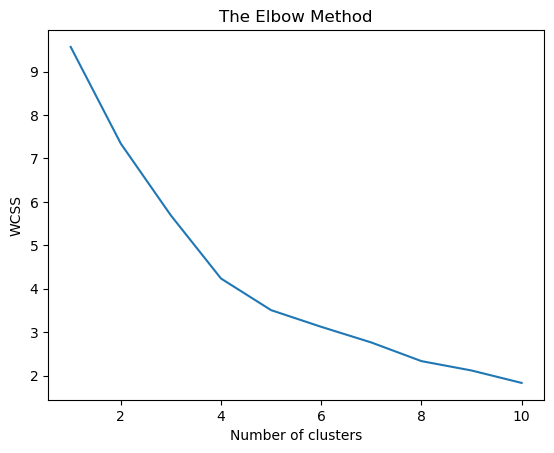

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

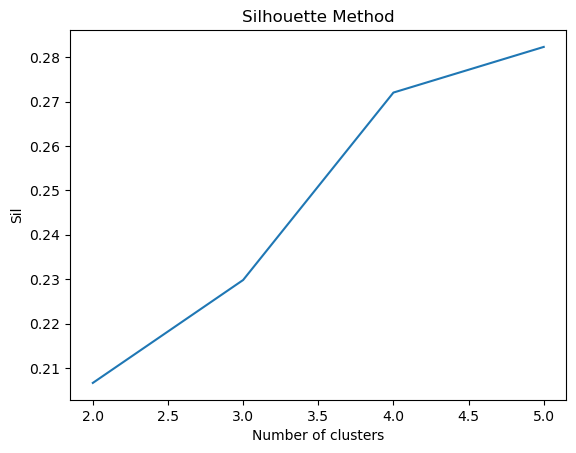

2:0.2066126181031292
3:0.2298043636055514
4:0.2720445688430875
5:0.2823299147766744


In [11]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters = k).fit(df)  
    preds = kmeans.fit_predict(df)
    sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
    print(str(i+2) +":"+ str(sil[i]))

In [12]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 5, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Країна', 'Загальна ставка податків та внесків на працю', 'Фактична гранична ставка податку', 'ВВП на душу населення', 'Співвідношення ІТ-спеціалістів до населення' ]).round(0)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

,Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0


In [13]:
from IPython.display import display, HTML



kms = KMeans(n_clusters=5, random_state=0)


kms.fit(df)


clusters = kms.labels_


data_with_clusters = pd.DataFrame(original_data, columns=['Країна', 'Загальна ставка податків та внесків на працю', 'Фактична гранична ставка податку', 'ВВП на душу населення', 'Співвідношення ІТ-спеціалістів до населення' ])
data_with_clusters['Кластер'] = clusters

for cluster_id in range(kms.n_clusters):
    print(f"Зміст кластера {cluster_id}:")
    cluster_data = data_with_clusters[data_with_clusters['Кластер'] == cluster_id].drop(columns='Кластер')
    display(HTML(cluster_data.to_html(index=False)))
    print("\n")


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Зміст кластера 0:


Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
12,37.9,57.18,33513.396658,0.017452
16,38.1,50.35,28673.647241,0.016670
17,42.6,44.45,34102.695332,0.015926
19,44.0,48.08,43718.565621,0.021960
21,40.8,51.37,32565.664838,0.014592
24,49.7,44.67,34310.802029,0.019385
26,47.0,54.10,37627.247885,0.015752
28,30.6,59.10,44213.328380,0.013967
29,45.2,41.50,9141.146147,0.006846




Зміст кластера 1:


Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
20,41.2,59.29,53764.551487,0.030280
22,39.8,71.77,31196.759800,0.018318
25,31.0,73.33,34962.242248,0.020278
27,49.1,75.70,51297.355075,0.036775




Зміст кластера 2:


Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
0,51.4,64.73,49955.223714,0.021661
1,55.4,72.85,46692.574840,0.020953
5,46.1,47.77,36337.125170,0.020554
7,47.8,54.48,33486.684485,0.030324
9,60.7,69.29,42483.791199,0.018106
10,48.8,54.73,50031.135655,0.023253
11,51.9,62.18,27336.588433,0.007370
15,59.1,54.02,37637.675975,0.013881




Зміст кластера 3:


Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
2,28.3,28.83,23874.626476,0.014935
3,20.5,63.97,2765.185443,0.001647
4,22.4,46.60,28089.342623,0.010348
14,25.3,57.63,36021.418577,0.001991
23,20.0,50.29,27164.126473,0.010487




Зміст кластера 4:


Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
6,23.8,66.19,51628.582513,0.025864
8,36.6,70.74,45036.332710,0.034301
13,26.1,64.35,81782.204244,0.026996
18,20.4,59.18,105202.297367,0.029548


In [14]:
кількість_країн_у_кожному_кластері = pd.Series(clusters).value_counts().reset_index()
кількість_країн_у_кожному_кластері.columns = ['Кластер', 'Кількість країн']
кількість_країн_у_кожному_кластері = кількість_країн_у_кожному_кластері.sort_values(by='Кластер')

display(HTML(кількість_країн_у_кожному_кластері.to_html(index=False)))

Кластер,Кількість країн
0,9
1,4
2,8
3,5
4,4


In [15]:
cluster_means = data_with_clusters.groupby('Кластер').mean()
display(HTML(cluster_means.to_html()))

,Країна,Загальна ставка податків та внесків на працю,Фактична гранична ставка податку,ВВП на душу населення,Співвідношення ІТ-спеціалістів до населення
Кластер,,,,,
0,21.333333,41.766667,50.088889,33096.277126,0.015839
1,23.500000,40.275000,70.022500,42805.227153,0.026413
2,7.250000,52.650000,60.006250,40495.099934,0.019513
3,9.200000,23.300000,49.464000,23582.939918,0.007882
4,11.250000,26.725000,65.115000,70912.354209,0.029177
